In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [4]:
sample_submission = pd.read_csv('./house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [5]:
train.describe(include = 'all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     91     1460        1460      1460  ...  1460.000000      7    281   
unique     2        4           4         2  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      50      925        1311      1459  ...          NaN      3    157   
mean     NaN      NaN         NaN       NaN  ...     2.758904    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    40.177307    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           54   1460.000000  1460.000000  1460.000000      1460   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            49           NaN          NaN          NaN      1267   
mean           NaN     43.489041     6.321918  2007.815753       NaN   
std            NaN    496.123024     2.703626     1.328095       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1460    1460.000000  
unique              6            NaN  
top            Normal            NaN  
freq             1198            NaN  
mean              NaN  180921.195890  
std               NaN   79442.502883  
min               NaN   34900.000000  
25%               NaN  129975.000000  
50%               NaN  163000.000000  
75%               NaN  214000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

### 1. Data cleaning and transforming for train set

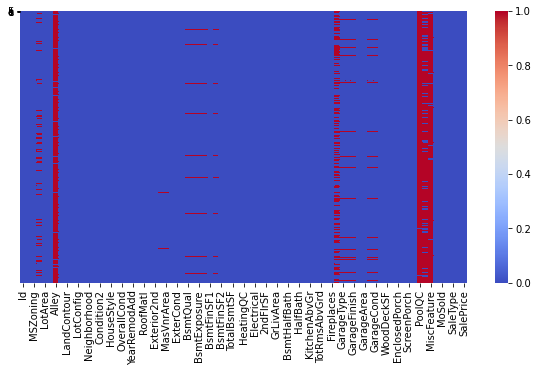

In [6]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.heatmap(data = train.isnull(),yticklabels='False',cmap ='coolwarm' )

#### These columns has NAN and it means they do not have that option and it does not mean missing value

For example Na for GarageCond it means there is not any garage in house. 
PoolQC, Fence, MiscFeature,Alley,MiscFeature, BsmtQual, BsmtCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageQual,GarageCond,MasVnrType

In [7]:
#Create data frame with columns have any missing value
null_col = train.loc[:, train.isnull().any()].columns

train_miss = train[null_col].drop(columns =['PoolQC','Fence','GarageFinish','FireplaceQu','MasVnrType','MiscFeature','Alley','MiscFeature', 'BsmtQual','BsmtCond','BsmtCond','BsmtFinType2','BsmtExposure','BsmtFinType1','GarageType','GarageQual','GarageCond'], axis = 1)
train_miss.head()

LotFrontage  MasVnrArea Electrical  GarageYrBlt
0         65.0       196.0      SBrkr       2003.0
1         80.0         0.0      SBrkr       1976.0
2         68.0       162.0      SBrkr       2001.0
3         60.0         0.0      SBrkr       1998.0
4         84.0       350.0      SBrkr       2000.0

In [8]:
# LotFrontage: Linear feet of street connected to property
# MasVnrArea: Masonry veneer area in square feet
# Electrical: Electrical system
# GarageYrBlt: Year garage was built

In [9]:
# missing value percentage in each column
miss_percentage = train_miss.isna().sum()/(len(train))*100
print(round(miss_percentage,2))

LotFrontage    17.74
MasVnrArea      0.55
Electrical      0.07
GarageYrBlt     5.55
dtype: float64


### 1.1 Missing in LotFrontage

In [10]:
# There is a relationship between LotArea,LotFrontage let's see to deep inside

In [11]:
# I start with new temp data frame because I dont need at the end of the investagation 
filt = ['LotArea','LotFrontage']
temp_df = train[filt]
temp_df.head()

LotArea  LotFrontage
0     8450         65.0
1     9600         80.0
2    11250         68.0
3     9550         60.0
4    14260         84.0

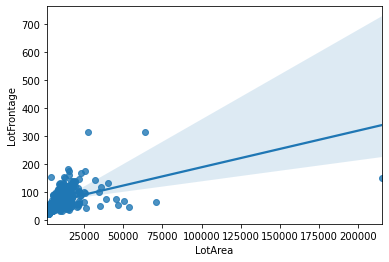

In [12]:
sns.regplot(x= temp_df['LotArea'], y = temp_df['LotFrontage']);

In [13]:
## When I compared Sqrt Area with Frontage the relationship is better 

In [14]:
temp_df['Sqrt_LotArea']=np.sqrt(temp_df['LotArea'])
temp_df.head()

LotArea  LotFrontage  Sqrt_LotArea
0     8450         65.0     91.923882
1     9600         80.0     97.979590
2    11250         68.0    106.066017
3     9550         60.0     97.724101
4    14260         84.0    119.415242

In [15]:
# Compare both with reg plot 

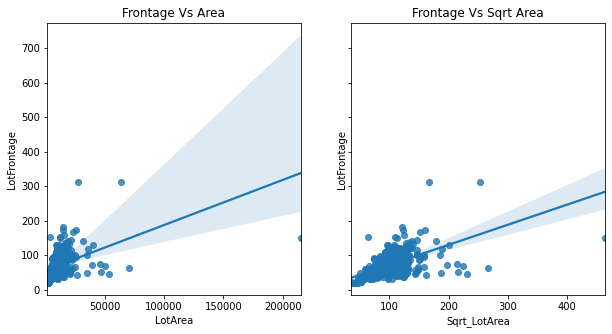

In [16]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10,5))
sns.regplot(ax = ax[0],x= temp_df['LotArea'], y = temp_df['LotFrontage'])
sns.regplot(ax = ax[1],x= temp_df['Sqrt_LotArea'], y = temp_df['LotFrontage'])
ax[0].set_title("Frontage Vs Area")
ax[1].set_title("Frontage Vs Sqrt Area");

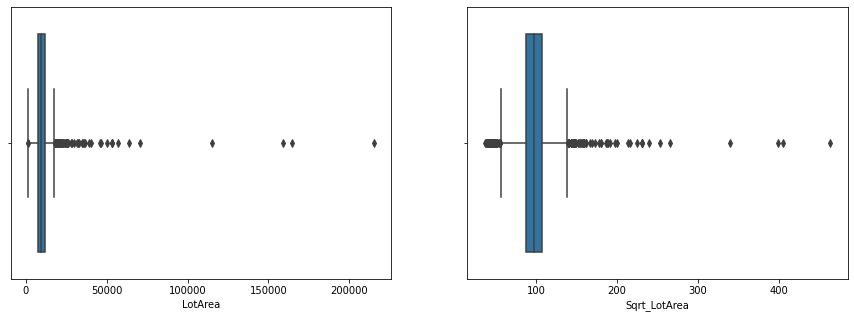

In [17]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

sns.boxplot(ax = axes[0],data = temp_df, x='LotArea')

sns.boxplot(ax = axes[1],data = temp_df , x ='Sqrt_LotArea');

In [18]:
# This relationship would not be linear, but some 2nd degree polynomial

In [19]:
# We should remove the outliers 
# my fist step is convert to Standard distribution 

In [20]:
mean_Area = temp_df['Sqrt_LotArea'].mean()
std_Area = temp_df['Sqrt_LotArea'].std()

temp_df['Sq_LotArea_z']= temp_df['Sqrt_LotArea'].apply(lambda x:(x-mean_Area)/std_Area)
temp_df.head()

LotArea  LotFrontage  Sqrt_LotArea  Sq_LotArea_z
0     8450         65.0     91.923882     -0.226781
1     9600         80.0     97.979590     -0.016122
2    11250         68.0    106.066017      0.265179
3     9550         60.0     97.724101     -0.025010
4    14260         84.0    119.415242      0.729557

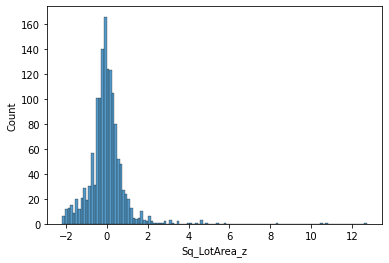

In [21]:
sns.histplot(data = temp_df, x= 'Sq_LotArea_z');

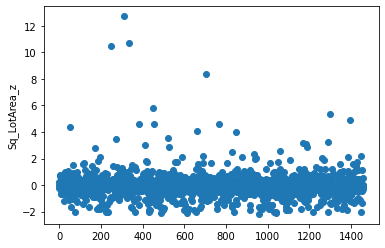

In [22]:
plt.scatter(x=temp_df.index,y = temp_df.Sq_LotArea_z)
plt.ylabel('Sq_LotArea_z');

In [23]:
temp_df.Sq_LotArea_z.max(),temp_df.Sq_LotArea_z.std(),temp_df.Sq_LotArea_z.min()

(12.71467009066397, 1.0, -2.1702671207951005)

In [24]:
# Here I decided to keep value less than std
filt_1 = temp_df['Sq_LotArea_z']< 1*(temp_df.Sq_LotArea_z.std())
temp_df = temp_df[filt_1]
temp_df.head()

LotArea  LotFrontage  Sqrt_LotArea  Sq_LotArea_z
0     8450         65.0     91.923882     -0.226781
1     9600         80.0     97.979590     -0.016122
2    11250         68.0    106.066017      0.265179
3     9550         60.0     97.724101     -0.025010
4    14260         84.0    119.415242      0.729557

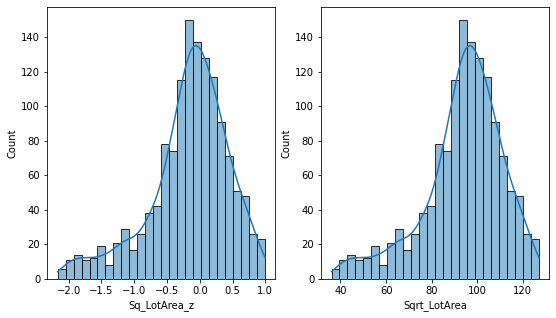

In [25]:
# After removing the outlires

fig ,ax = plt.subplots(1,2,figsize = (9,5))

sns.histplot(data = temp_df, x= 'Sq_LotArea_z', kde = True, ax= ax[0])
sns.histplot(data = temp_df, x= 'Sqrt_LotArea', kde = True, ax = ax[1]);

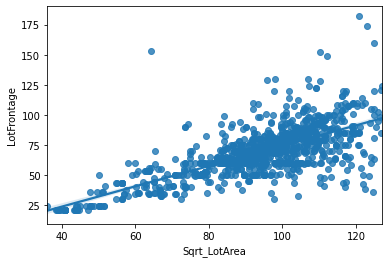

In [26]:
sns.regplot(x = temp_df['Sqrt_LotArea'],y = temp_df['LotFrontage']);

In [27]:
## for missing value in each row of Frontage I replace sqrt Area for that row

train['LotFrontage'].fillna(0,inplace = True)
train.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1261  1262          20       RL         80.0     9600   Pave   NaN      Reg   
189    190         120       RL         41.0     4923   Pave   NaN      Reg   
972    973         120       RL         55.0     7892   Pave   NaN      Reg   
79      80          50       RM         60.0    10440   Pave  Grvl      Reg   
201    202          20       RL         75.0    10125   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1261         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
189          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
972          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
79           Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
201          Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1261      6   2009        WD         Normal     128900  
189       8   2008        WD         Normal     286000  
972       4   2010        WD         Normal      99500  
79        5   2009        WD         Normal     110000  
201       2   2008        WD         Normal     171500  

[5 rows x 81 columns]

In [28]:
train_clean = train.copy()

# I replace missing value with sqr Area
train_clean['LotFrontage'] = np.where(train_clean['LotFrontage'] != 0, train_clean['LotFrontage'],np.sqrt(train_clean['LotArea']))

train_clean.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
294    295          20       RL    80.000000     9600   Pave   NaN      Reg   
414    415          60       RL    59.000000    11228   Pave   NaN      IR2   
672    673          20       RL   106.066017    11250   Pave   NaN      IR1   
213    214          20       RL    43.000000    13568   Pave   NaN      IR2   
1333  1334          50       RM    60.000000     7200   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
294          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
414          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
672          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
213          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1333         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
294      10   2009        WD         Normal     167000  
414      12   2008        WD         Normal     228000  
672       6   2006        WD         Normal     165000  
213       7   2006        WD         Normal     156000  
1333      7   2006        WD         Normal     125500  

[5 rows x 81 columns]

### 2.1 Missing values in MasVnrArea

<AxesSubplot:xlabel='MasVnrArea'>

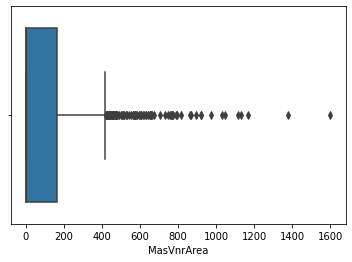

In [29]:
sns.boxplot(train.MasVnrArea)

In [30]:
# If we compare Mas Area and Mas Type , it shows if there is not  any Mas Type  equal to there is not Mas area  
filt_2 = ['MasVnrArea','MasVnrType']
train[filt_2]

MasVnrArea MasVnrType
0          196.0    BrkFace
1            0.0       None
2          162.0    BrkFace
3            0.0       None
4          350.0    BrkFace
...          ...        ...
1455         0.0       None
1456       119.0      Stone
1457         0.0       None
1458         0.0       None
1459         0.0       None

[1460 rows x 2 columns]

In [31]:
train['MasVnrArea'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: MasVnrArea, Length: 1460, dtype: bool

In [32]:
filt_3 = train['MasVnrArea'].isnull()
train[filt_3][['Id','MasVnrArea','MasVnrType']]

Id  MasVnrArea MasVnrType
234    235         NaN        NaN
529    530         NaN        NaN
650    651         NaN        NaN
936    937         NaN        NaN
973    974         NaN        NaN
977    978         NaN        NaN
1243  1244         NaN        NaN
1278  1279         NaN        NaN

In [33]:
# Replace NaN with 0
train_clean['MasVnrArea'].fillna(0,inplace = True)

### 3.1 Missing values in Electrical

In [34]:
filt_4 = train['Electrical'].isnull()
train[filt_4][['Id','Electrical']]

Id Electrical
1379  1380        NaN

In [35]:
# Most of the building is SBrkr
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [36]:
train_clean['Electrical'].fillna('SBrkr',inplace = True)

### 4.1 Missing Values in GarageYrBlt

In [37]:
train['GarageYrBlt'].isnull().sum()

81

In [38]:
# How many houses have same date for YearBuilt and GarageYrBlt

filt_5 = train[train['YearBuilt'] == train['GarageYrBlt']]
print('%' ,round(filt_5.shape[0]/train.shape[0],2)*100)

% 75.0


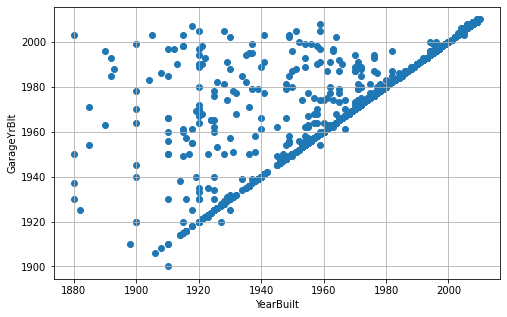

In [39]:
# This plot shows after year 1970 the date for built garage are the same with the built house date 
fig, ax = plt.subplots(figsize=(8,5))

plt.scatter(x=train['YearBuilt'],y=train['GarageYrBlt'])
plt.xlabel('YearBuilt')
plt.ylabel('GarageYrBlt')
plt.grid(True)

In [40]:
# Replace miss in garage with year house
train_clean['GarageYrBlt'].fillna(train_clean['YearBuilt'],inplace = True)

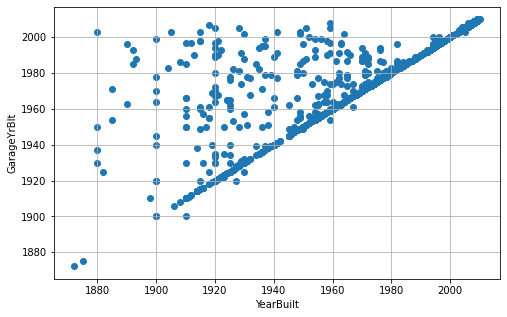

In [41]:
# new plot after replace missing values 
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(x=train_clean['YearBuilt'],y=train_clean['GarageYrBlt'])
plt.xlabel('YearBuilt')
plt.ylabel('GarageYrBlt')
plt.grid(True)

In [42]:
# replace the rest of the NAN value with 0 _ at the first of notebook I wrote a note
train_clean.fillna(0,inplace = True)

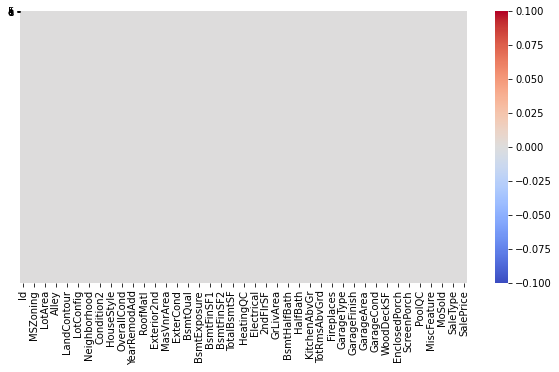

In [43]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.heatmap(data = train_clean.isnull(),yticklabels='False',cmap ='coolwarm' )

In [44]:
null_col = train_clean.loc[:, train_clean.isnull().any()].columns
null_col

Index([], dtype='object')

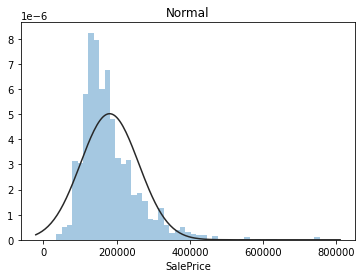

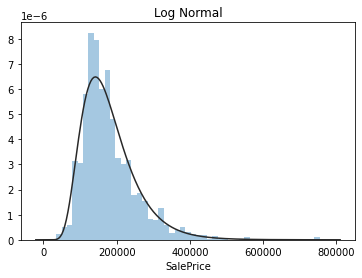

In [45]:
# Let' see how is Price distribution 
import scipy.stats as st
y = train_clean['SalePrice']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm);

In [46]:
# It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. 
# While log transformation does pretty good job

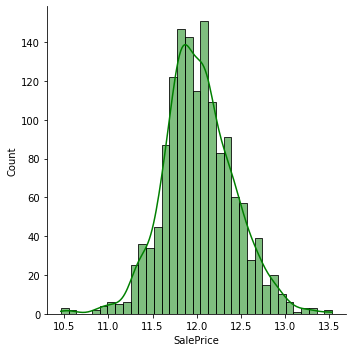

In [47]:
# Convert Price to Normal Dist
log_price = np.log(train_clean['SalePrice'])
train_clean['SalePrice'] = log_price

sns.displot(train_clean['SalePrice'], color ='green',kde =True);

In [48]:
# Find most important features relative to target

print("Find most important features relative to target")

corrmat = train_clean.corr()
correlations = corrmat["SalePrice"].sort_values(ascending=False)
features = correlations.index[0:10]
print(features)

Find most important features relative to target
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'GarageYrBlt'],
      dtype='object')


In [49]:
quantitative = train_clean.select_dtypes(exclude='object')

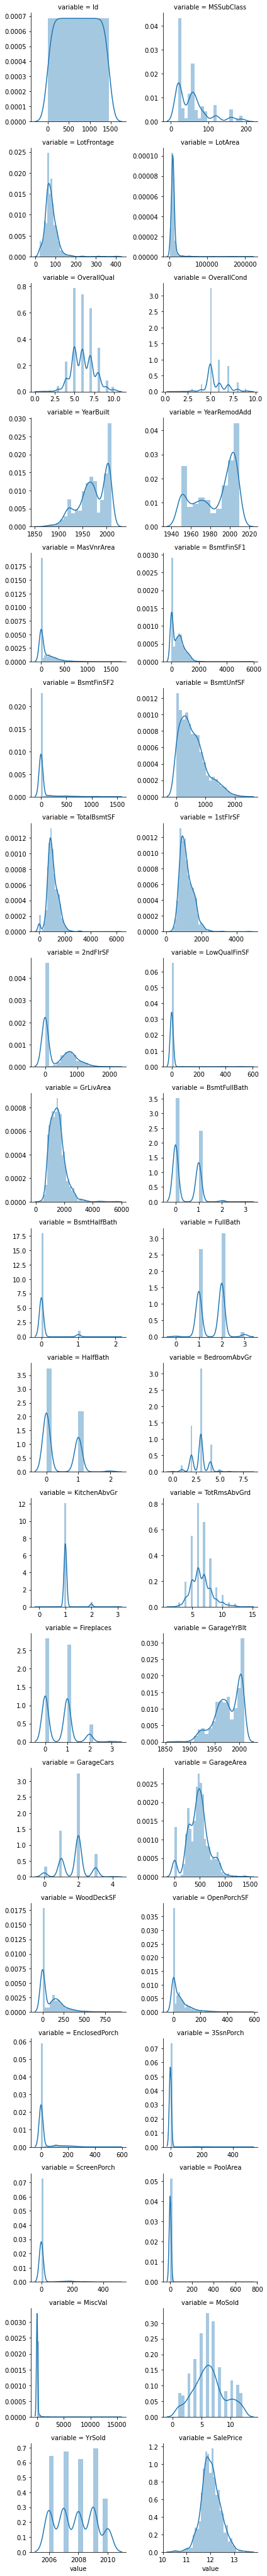

In [50]:
f = pd.melt(train_clean, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [51]:
# I used log transformer for some features

train_clean['LotArea'] = np.log(train_clean['LotArea'])

train_clean['GrLivArea'] = np.log(train_clean['GrLivArea'])

train_clean['1stFlrSF'] = np.log(train_clean['1stFlrSF'])

In [52]:
# last step is convert categorical features into 
train_clean = pd.get_dummies(train_clean)
train_clean.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0  9.041922            7            5       2003   
1   2          20         80.0  9.169518            6            8       1976   
2   3          60         68.0  9.328123            7            5       2001   
3   4          70         60.0  9.164296            7            5       1915   
4   5          60         84.0  9.565214            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0         706  ...               0             0   
1          1976         0.0         978  ...               0             0   
2          2002       162.0         486  ...               0             0   
3          1970         0.0         216  ...               0             0   
4          2000       350.0         655  ...               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             0            1                      0                      0   
1             0            1                      0                      0   
2             0            1                      0                      0   
3             0            1                      1                      0   
4             0            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 305 columns]

###  2. Data cleaning and transforming for test set 

In [53]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

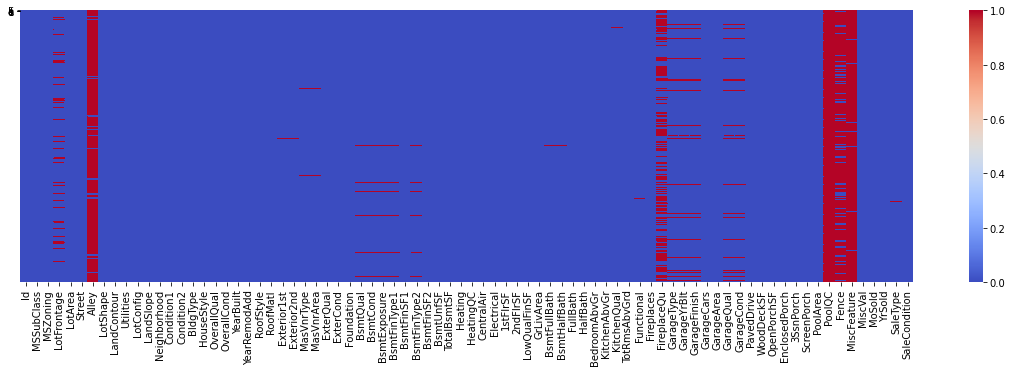

In [54]:
fig, ax = plt.subplots(figsize = (20,5))
ax = sns.heatmap(data = test.isnull(),yticklabels='False',cmap ='coolwarm' )

In [55]:
null_col = test.loc[:, test.isnull().any()].columns

test_miss = test[null_col].drop(columns =['PoolQC','Fence','GarageFinish','FireplaceQu','MasVnrType','MiscFeature','Alley','MiscFeature', 'BsmtQual','BsmtCond','BsmtCond','BsmtFinType2','BsmtExposure','BsmtFinType1','GarageType','GarageQual','GarageCond'], axis = 1)

test_miss.head()

MSZoning  LotFrontage Utilities Exterior1st Exterior2nd  MasVnrArea  \
0       RH         80.0    AllPub     VinylSd     VinylSd         0.0   
1       RL         81.0    AllPub     Wd Sdng     Wd Sdng       108.0   
2       RL         74.0    AllPub     VinylSd     VinylSd         0.0   
3       RL         78.0    AllPub     VinylSd     VinylSd        20.0   
4       RL         43.0    AllPub     HdBoard     HdBoard         0.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  \
0       468.0       144.0      270.0        882.0           0.0           0.0   
1       923.0         0.0      406.0       1329.0           0.0           0.0   
2       791.0         0.0      137.0        928.0           0.0           0.0   
3       602.0         0.0      324.0        926.0           0.0           0.0   
4       263.0         0.0     1017.0       1280.0           0.0           0.0   

  KitchenQual Functional  GarageYrBlt  GarageCars  GarageArea SaleType  
0          TA        Typ       1961.0         1.0       730.0       WD  
1          Gd        Typ       1958.0         1.0       312.0       WD  
2          TA        Typ       1997.0         2.0       482.0       WD  
3          Gd        Typ       1998.0         2.0       470.0       WD  
4          Gd        Typ       1992.0         2.0       506.0       WD

In [56]:
# missing value percentage in each column
miss_percentage = test_miss.isna().sum()/(len(test))*100
print(round(miss_percentage,2))

MSZoning         0.27
LotFrontage     15.56
Utilities        0.14
Exterior1st      0.07
Exterior2nd      0.07
MasVnrArea       1.03
BsmtFinSF1       0.07
BsmtFinSF2       0.07
BsmtUnfSF        0.07
TotalBsmtSF      0.07
BsmtFullBath     0.14
BsmtHalfBath     0.14
KitchenQual      0.07
Functional       0.14
GarageYrBlt      5.35
GarageCars       0.07
GarageArea       0.07
SaleType         0.07
dtype: float64


In [57]:
test_clean = test.copy()

In [58]:
Mask_5 = test['MSZoning'].isnull()
test[Mask_5]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
455   1916          30      NaN        109.0    21780   Grvl   NaN      Reg   
756   2217          20      NaN         80.0    14584   Pave   NaN      Reg   
790   2251          70      NaN          NaN    56600   Pave   NaN      IR1   
1444  2905          20      NaN        125.0    31250   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
455          Lvl       NaN  ...           0        0    NaN   NaN         NaN   
756          Low    AllPub  ...           0        0    NaN   NaN         NaN   
790          Low    AllPub  ...           0        0    NaN   NaN         NaN   
1444         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  
455        0      3    2009     ConLD         Normal  
756        0      2    2008        WD        Abnorml  
790        0      1    2008        WD         Normal  
1444       0      5    2006        WD         Normal  

[4 rows x 80 columns]

In [59]:
test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [60]:
test_clean['MSZoning'].fillna('RL', inplace = True)

In [61]:
Mask_6 = test['LotFrontage'].isnull()
test[Mask_6].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
6   1467          20       RL          NaN     7980   Pave   NaN      IR1   
40  1501         160       FV          NaN     2980   Pave   NaN      Reg   
41  1502         160       FV          NaN     2403   Pave   NaN      IR1   
45  1506          20       RL          NaN    10456   Pave   NaN      IR1   
47  1508          50       RL          NaN    18837   Pave   NaN      IR1   

   LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
6          Lvl    AllPub  ...           0        0    NaN  GdPrv        Shed   
40         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
41         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
45         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
47         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  
6      500      3    2010        WD         Normal  
40       0      5    2010        WD         Normal  
41       0      6    2010        WD         Normal  
45       0      5    2010        WD         Normal  
47       0      4    2010        WD         Normal  

[5 rows x 80 columns]

In [62]:
test_clean['LotFrontage'].fillna(0, inplace = True)

test_clean['LotFrontage'] = np.where(test_clean['LotFrontage'] != 0, test_clean['LotFrontage'],np.sqrt(test_clean['LotArea']))

In [63]:
Mask_6 = test['Utilities'].isnull()
test[Mask_6]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
455  1916          30      NaN        109.0    21780   Grvl   NaN      Reg   
485  1946          20       RL          NaN    31220   Pave   NaN      IR1   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
455         Lvl       NaN  ...           0        0    NaN   NaN         NaN   
485         Bnk       NaN  ...           0        0    NaN   NaN        Shed   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
455       0      3    2009     ConLD         Normal  
485     750      5    2008        WD         Normal  

[2 rows x 80 columns]

In [64]:
test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [65]:
test_clean['Utilities'].fillna('AllPub', inplace = True)

In [66]:
Mask_6 = test['Exterior1st'].isnull()
test[Mask_6]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691  2152          30       RL         85.0    19550   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
691         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
691       0      1    2008        WD         Normal  

[1 rows x 80 columns]

In [67]:
test['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [68]:
test_clean['Exterior1st'].fillna('VinylSd', inplace = True)

In [69]:
Mask_7 = test['Exterior2nd'].isnull()
test[Mask_7]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691  2152          30       RL         85.0    19550   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
691         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
691       0      1    2008        WD         Normal  

[1 rows x 80 columns]

In [70]:
test['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64

In [71]:
test_clean['Exterior2nd'].fillna('VinylSd', inplace = True)

In [72]:
# for columns have %7 to %14 missing value I replaced with Most frequent value (Mod) 

test_clean['MasVnrArea'].fillna(0,inplace = True)
test_clean['BsmtFinSF1'].fillna(test_clean['BsmtFinSF1'].mode(),inplace = True)
test_clean['BsmtFinSF2'].fillna(test_clean['BsmtFinSF2'].mode(),inplace = True)
test_clean['BsmtUnfSF'].fillna(test_clean['BsmtUnfSF'].mode(),inplace = True)
test_clean['TotalBsmtSF'].fillna(test_clean['TotalBsmtSF'].mode(),inplace = True)
test_clean['BsmtFullBath'].fillna(test_clean['BsmtFullBath'].mode(),inplace = True)
test_clean['BsmtHalfBath'].fillna(test_clean['BsmtHalfBath'].mode(),inplace = True)
test_clean['KitchenQual'].fillna(test_clean['KitchenQual'].mode(),inplace = True)
test_clean['KitchenQual'].fillna(test_clean['KitchenQual'].mode(),inplace = True)
test_clean['Functional'].fillna(test_clean['Functional'].mode(),inplace = True)
test_clean['GarageCars'].fillna(test_clean['GarageCars'].mode(),inplace = True)
test_clean['GarageArea'].fillna(test_clean['GarageArea'].mode(),inplace = True)
test_clean['SaleType'].fillna(test_clean['SaleType'].mode(),inplace = True)
test_clean['GarageYrBlt'].fillna(test_clean['YearBuilt'], inplace = True)

In [73]:
# for rest of the features with NAN ( means that features have not that option)

test_clean.fillna(0, inplace = True)

In [74]:
test_clean.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

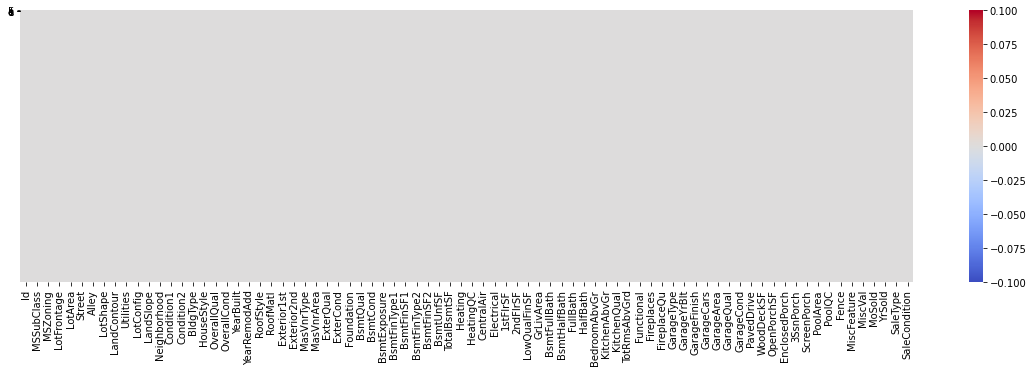

In [75]:
# last control for missing values
fig, ax = plt.subplots(figsize = (20,5))
ax = sns.heatmap(data = test_clean.isnull(),yticklabels='False',cmap ='coolwarm' )

In [76]:
# I used log transformer for some independ variable

test_clean['LotArea'] = np.log(test_clean['LotArea'])

test_clean['GrLivArea'] = np.log(test_clean['GrLivArea'])

test_clean['1stFlrSF'] = np.log(test_clean['1stFlrSF'])

In [77]:
test_clean = pd.get_dummies(test_clean)
test_clean.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0  1461          20         80.0  9.360655            5            6   
1  1462          20         81.0  9.565704            6            6   
2  1463          60         74.0  9.534595            5            5   
3  1464          60         78.0  9.208138            6            6   
4  1465         120         43.0  8.518193            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0       1961          1961         0.0       468.0  ...               0   
1       1958          1958       108.0       923.0  ...               0   
2       1997          1998         0.0       791.0  ...               0   
3       1998          1998        20.0       602.0  ...               0   
4       1992          1992         0.0       263.0  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      0   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     1                      0  
4                     1                      0  

[5 rows x 289 columns]

In [78]:
# Control size for train and test set
train_clean.shape, test_clean.shape,test.shape,train.shape

((1460, 305), (1459, 289), (1459, 80), (1460, 81))

In [79]:
train_clean.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=305)

In [80]:
add_col_1 = train_clean.columns.difference(test_clean.columns)
add_col_1

Index(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageQual_Ex', 'Heating_Floor', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'PoolQC_Fa',
       'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'SalePrice', 'Utilities_NoSeWa'],
      dtype='object')

In [81]:
test_clean[add_col_1] = 0

In [82]:
train_clean.shape, test_clean.shape

((1460, 305), (1459, 308))

In [83]:
# I have to keep some additional column with 0 value for X before modeling because I have them in test set

add_col_2 = test_clean.columns.difference(train_clean.columns)
add_col_2

Index(['Functional_0', 'KitchenQual_0', 'SaleType_0'], dtype='object')

In [84]:
train_clean[add_col_2]=0

In [85]:
train_clean.shape,test_clean.shape

((1460, 308), (1459, 308))

In [86]:
# I have to have same columns in both 

new_test = test_clean[train_clean.columns]

## 2.Feature Enginerring  and Visualization

In [87]:
# Corrolation matrix for important feaetures
train_clean[features].corr()

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  \
SalePrice     1.000000     0.817184   0.730255    0.680625    0.650888   
OverallQual   0.817184     1.000000   0.614210    0.600671    0.562022   
GrLivArea     0.730255     0.614210   1.000000    0.496132    0.476160   
GarageCars    0.680625     0.600671   0.496132    1.000000    0.882475   
GarageArea    0.650888     0.562022   0.476160    0.882475    1.000000   
TotalBsmtSF   0.612134     0.537808   0.435852    0.434585    0.486665   
1stFlrSF      0.608947     0.456036   0.545984    0.448201    0.486053   
FullBath      0.594771     0.550600   0.653160    0.469672    0.405656   
YearBuilt     0.586570     0.572323   0.235518    0.537850    0.478954   
GarageYrBlt   0.568696     0.555022   0.264591    0.619897    0.602803   

             TotalBsmtSF  1stFlrSF  FullBath  YearBuilt  GarageYrBlt  
SalePrice       0.612134  0.608947  0.594771   0.586570     0.568696  
OverallQual     0.537808  0.456036  0.550600   0.572323     0.555022  
GrLivArea       0.435852  0.545984  0.653160   0.235518     0.264591  
GarageCars      0.434585  0.448201  0.469672   0.537850     0.619897  
GarageArea      0.486665  0.486053  0.405656   0.478954     0.602803  
TotalBsmtSF     1.000000  0.779571  0.323722   0.391452     0.345936  
1stFlrSF        0.779571  1.000000  0.368137   0.277478     0.262051  
FullBath        0.323722  0.368137  1.000000   0.468271     0.463811  
YearBuilt       0.391452  0.277478  0.468271   1.000000     0.845141  
GarageYrBlt     0.345936  0.262051  0.463811   0.845141     1.000000

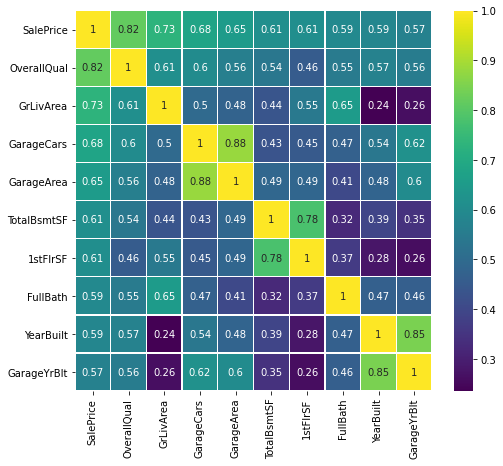

In [88]:
fig = plt.figure(figsize=(8, 7))

sns.heatmap(train_clean[features].corr(), cmap='viridis',annot =True,linewidth = 0.2);

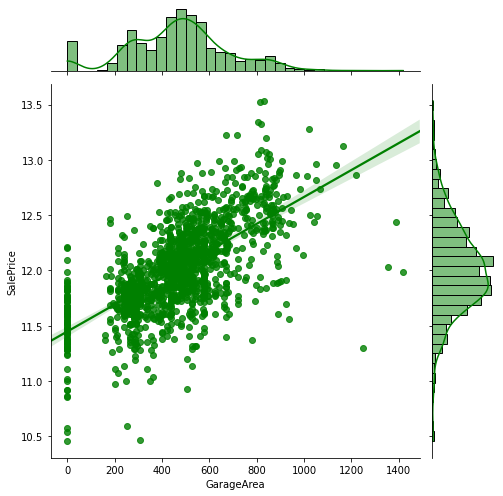

In [89]:
g = sns.jointplot(x="GarageArea", y="SalePrice", data=train_clean,kind="reg", truncate=False,
                    color="g", height=7)

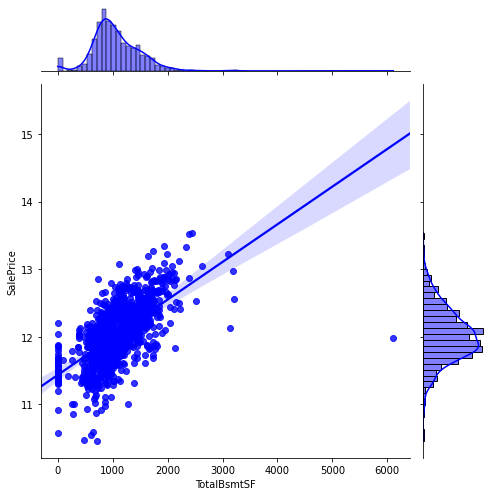

In [90]:
g = sns.jointplot(x="TotalBsmtSF", y="SalePrice", data=train_clean,
                  kind="reg", truncate=False,
                    color="b", height=7)

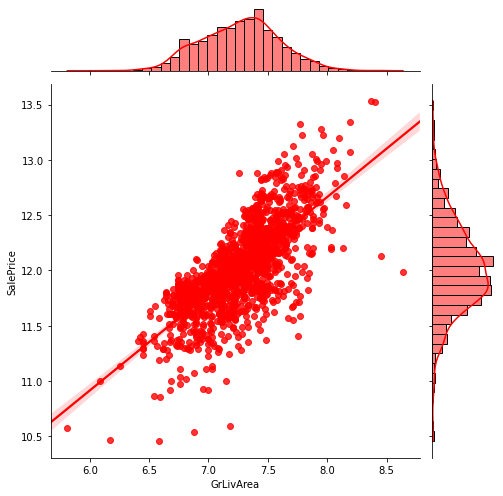

In [91]:
g = sns.jointplot(x="GrLivArea", y="SalePrice", data=train_clean,
                  kind="reg", truncate=False,
                  color="r", height=7)

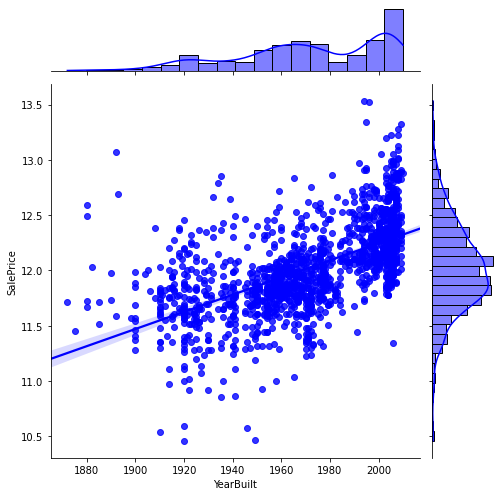

In [92]:
g = sns.jointplot(x="YearBuilt", y="SalePrice", data=train_clean,kind="reg", truncate=False,
                    color="b", height=7)

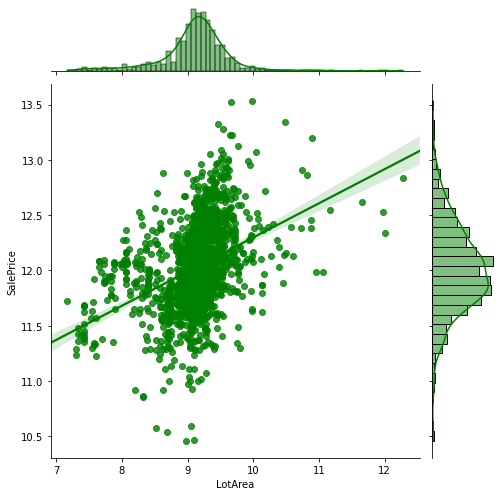

In [93]:
g = sns.jointplot(x="LotArea", y="SalePrice", data=train_clean,kind="reg", truncate=False,
                    color="g", height=7)

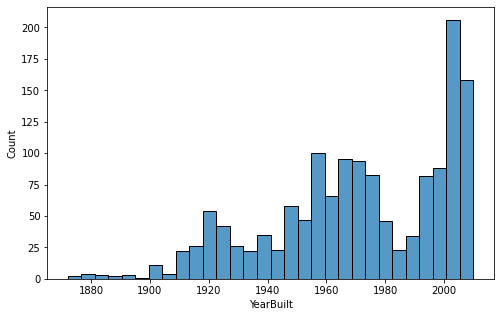

In [94]:
fig , ax = plt.subplots(figsize = (8,5))
sns.histplot(data = train, x= 'YearBuilt', bins =30);

In [95]:
fig = px.scatter(train, x='YearBuilt', y="SalePrice", color='OverallQual')
fig.show()

In [96]:
fig = px.scatter(train, x='YearBuilt', y="SalePrice", color='OverallCond')
fig.show()

In [97]:
fig = px.scatter(train, x='YearBuilt', y="SalePrice", color='RoofStyle')
fig.show()

In [98]:
fig = px.scatter(train, x='YearBuilt', y="SalePrice", color='HeatingQC')
fig.show()
